# **Introduction to Sampling**

---

## **Konsep Dasar Sampling**

### Apa itu Sampling?

**Sampling** adalah proses memilih sebagian kecil data (*subset*) dari populasi yang lebih besar, untuk **mewakili keseluruhan populasi**.
Dalam statistik dan *data science*, sampling membantu kita:

* Menghemat waktu dan biaya.
* Menghindari kebutuhan memproses seluruh data (yang seringkali sangat besar).
* Membuat inferensi atau generalisasi tentang populasi.

---

### **Perbedaan Populasi dan Sampel**

| Konsep       | Penjelasan                                                 | Contoh dalam Data Science                                           |
| ------------ | ---------------------------------------------------------- | ------------------------------------------------------------------- |
| **Populasi** | Seluruh kumpulan data yang ingin kita pahami.              | Semua pengguna aplikasi e-commerce dalam 1 tahun (5 juta pengguna). |
| **Sampel**   | Sebagian data yang diambil dari populasi untuk dianalisis. | 10.000 pengguna yang dipilih acak dari 5 juta pengguna.             |

>  *Tujuan utama:* dari sampel, kita ingin **menyimpulkan** (infer) karakteristik populasi.

---

## **Mengapa Sampling Penting di Data Science?**

Dalam *real-world data*, sering kali:

* Dataset terlalu besar (jutaan baris).
* Proses komputasi (machine learning, EDA) akan sangat lambat.
* Sampling membantu membuat **prototipe cepat** dan **eksperimen efisien**.

📌 Contoh kasus:

> Seorang data scientist ingin memprediksi churn pelanggan dari 10 juta data transaksi.
> Ia bisa mengambil 1% data secara acak untuk eksplorasi awal sebelum melatih model penuh.

---

## **Jenis Sampling dalam Data Science**

| Jenis Sampling             | Penjelasan                                                                    | Contoh Python                                    |
| -------------------------- | ----------------------------------------------------------------------------- | ------------------------------------------------ |
| **Simple Random Sampling** | Setiap observasi punya peluang sama untuk dipilih.                            | `df.sample(n=100)`                               |
| **Stratified Sampling**    | Data dikelompokkan berdasarkan kategori tertentu, lalu diambil proporsional.  | `train_test_split(..., stratify=y)`              |
| **Systematic Sampling**    | Mengambil setiap elemen ke-n dari data.                                       | Pilih setiap baris ke-10.                        |
| **Cluster Sampling**       | Populasi dibagi dalam kelompok (cluster), lalu beberapa cluster diambil acak. | Pilih 3 kota acak dari seluruh provinsi.         |
| **Convenience Sampling**   | Berdasarkan kemudahan akses (biasanya tidak acak).                            | Menggunakan data pelanggan yang tersedia duluan. |

---

## **Implementasi Sampling dengan Python**

Kita akan memakai **Pandas** dan **NumPy** untuk simulasi dasar sampling.

### Contoh 1 — *Simple Random Sampling*

```python
import pandas as pd
import numpy as np

# Membuat dataset populasi (10.000 pengguna dengan skor kepuasan acak)
np.random.seed(42)
populasi = pd.DataFrame({
    'user_id': range(1, 10001),
    'satisfaction_score': np.random.randint(1, 6, 10000)  # skala 1-5
})

# Mengambil sampel acak sebanyak 100 pengguna
sampel = populasi.sample(n=100, random_state=42)

# Melihat rata-rata populasi vs rata-rata sampel
print("Rata-rata populasi:", populasi['satisfaction_score'].mean())
print("Rata-rata sampel:", sampel['satisfaction_score'].mean())
```

**Penjelasan kode:**

* Dataset `populasi` berisi 10.000 pengguna.
* Kita ambil 100 pengguna secara acak (`sample()` dari Pandas).
* Rata-rata skor dari sampel mendekati rata-rata populasi → inilah **representasi statistik** dari populasi melalui sampling.

---

### Contoh 2 — *Stratified Sampling (berdasarkan kategori)*

Misalkan kita punya dataset pelanggan dengan jenis keanggotaan (Regular, Premium, VIP).

```python
# Membuat dataset
df = pd.DataFrame({
    'customer_id': range(1, 101),
    'membership': np.random.choice(['Regular', 'Premium', 'VIP'], 100, p=[0.6, 0.3, 0.1])
})

# Proporsi di populasi
print(df['membership'].value_counts(normalize=True))

# Stratified Sampling: ambil 20% dari tiap kategori
sampel_strata = df.groupby('membership', group_keys=False).apply(
    lambda x: x.sample(frac=0.2, random_state=1)
)

print("\nProporsi di sampel:")
print(sampel_strata['membership'].value_counts(normalize=True))
```

**Hasil:**

* Proporsi pada sampel akan tetap mendekati proporsi populasi.
* Cocok digunakan dalam *machine learning* ketika kita ingin menjaga keseimbangan kelas (class balance).

---

### Contoh 3 — *Systematic Sampling*

```python
# Misalkan kita ingin mengambil setiap data ke-50
systematic_sample = populasi.iloc[::50, :]
print(systematic_sample.head())
```

Kegunaan:

* Cepat dan sederhana.
* Cocok jika data sudah diacak sebelumnya.
* Tidak cocok jika data memiliki pola berulang (karena bisa bias).

---

## **Hubungan Sampling dengan Machine Learning**

Sampling sering digunakan dalam:

1. **Train-test split** — membagi data secara acak antara training dan testing set.

   ```python
   from sklearn.model_selection import train_test_split

   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   ```
2. **Cross-validation** — membagi data menjadi beberapa sampel untuk evaluasi model.
3. **Downsampling / Upsampling** — mengatasi *imbalanced data*.

---

## **Kesimpulan**

* Sampling adalah dasar inferensi statistik dan analisis data.
* Dalam *data science*, sampling digunakan untuk efisiensi, eksplorasi cepat, dan generalisasi hasil.
* Python menyediakan fungsi sederhana (`sample`, `train_test_split`, `groupby`) untuk melakukan sampling acak maupun terstratifikasi.

---



In [1]:
import pandas as pd
import numpy as np

# Membuat dataset populasi (10.000 pengguna dengan skor kepuasan acak)
np.random.seed(42)
populasi = pd.DataFrame({
    'user_id': range(1, 10001),
    'satisfaction_score': np.random.randint(1, 6, 10000)  # skala 1-5
})

# Mengambil sampel acak sebanyak 100 pengguna
sampel = populasi.sample(n=100, random_state=42)

# Melihat rata-rata populasi vs rata-rata sampel
print("Rata-rata populasi:", populasi['satisfaction_score'].mean())
print("Rata-rata sampel:", sampel['satisfaction_score'].mean())

Rata-rata populasi: 2.9903
Rata-rata sampel: 2.7


In [2]:
# Membuat dataset
df = pd.DataFrame({
    'customer_id': range(1, 101),
    'membership': np.random.choice(['Regular', 'Premium', 'VIP'], 100, p=[0.6, 0.3, 0.1])
})

# Proporsi di populasi
print(df['membership'].value_counts(normalize=True))

# Stratified Sampling: ambil 20% dari tiap kategori
sampel_strata = df.groupby('membership', group_keys=False).apply(
    lambda x: x.sample(frac=0.2, random_state=1)
)

print("\nProporsi di sampel:")
print(sampel_strata['membership'].value_counts(normalize=True))

membership
Regular    0.58
Premium    0.34
VIP        0.08
Name: proportion, dtype: float64

Proporsi di sampel:
membership
Regular    0.571429
Premium    0.333333
VIP        0.095238
Name: proportion, dtype: float64


C:\Users\ranggo\AppData\Local\Temp\ipykernel_23784\2044700338.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampel_strata = df.groupby('membership', group_keys=False).apply(


# **Sampling dan Bias**


## 1. Apa itu Sampling Bias?

**Sampling bias** terjadi ketika **sampel yang diambil tidak mewakili populasi secara akurat**, sehingga hasil analisis menjadi menyesatkan.
Dengan kata lain, bias muncul saat **proses pengambilan sampel “condong” ke arah kelompok tertentu** dan mengabaikan sebagian populasi.

### Contoh Konseptual:

Misalkan kamu ingin mengetahui **rata-rata waktu penggunaan media sosial di Indonesia**, tetapi kamu hanya menyurvei **mahasiswa di kota besar**.
Hasilnya akan **bias**, karena kamu tidak menyertakan responden dari **desa, usia tua, atau pekerja non-mahasiswa**, yang mungkin memiliki kebiasaan berbeda.

---

## 2. Jenis-Jenis Bias dalam Sampling

| Jenis Bias                  | Penjelasan                                                                                                       | Contoh                                                                                              |
| --------------------------- | ---------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------- |
| **Selection Bias**          | Terjadi saat sebagian kelompok populasi memiliki peluang lebih besar untuk dipilih.                              | Survei hanya dilakukan online → tidak mencakup orang tanpa akses internet.                          |
| **Nonresponse Bias**        | Terjadi saat sebagian responden tidak menjawab, dan kelompok yang tidak menjawab memiliki karakteristik berbeda. | Survei penghasilan, di mana orang berpenghasilan tinggi enggan menjawab.                            |
| **Undercoverage Bias**      | Beberapa bagian populasi tidak termasuk dalam kerangka sampling.                                                 | Menggunakan daftar nomor telepon rumah → mengecualikan orang yang hanya punya HP.                   |
| **Voluntary Response Bias** | Responden secara sukarela ikut, biasanya yang punya opini kuat.                                                  | Survei online terbuka di Twitter → hanya diisi oleh pengguna aktif yang peduli pada topik tersebut. |

---

## 3. Dampak Sampling Bias

* **Statistik menjadi tidak valid**: rata-rata, proporsi, atau distribusi hasil tidak merepresentasikan populasi.
* **Inferensi gagal**: kesimpulan dari sampel tidak bisa digeneralisasikan.
* **Model Machine Learning menjadi tidak adil (unfair)**: model cenderung performa tinggi untuk kelompok tertentu saja.

---

## 4. Contoh Kasus dalam Data Science

Bayangkan kamu sedang melatih model **Machine Learning untuk mendeteksi penyakit jantung** berdasarkan data pasien.
Jika dataset kamu hanya berisi data pasien **laki-laki usia 40–60 tahun**, maka model tersebut akan **bias** — performanya buruk untuk **perempuan atau usia muda**.

---

## 5. Simulasi Sampling Bias dengan Python

Kita akan membuat simulasi sederhana untuk melihat bagaimana bias memengaruhi rata-rata hasil.

```python
import numpy as np
import matplotlib.pyplot as plt

# Populasi: pendapatan (dalam juta rupiah)
np.random.seed(42)
populasi = np.concatenate([
    np.random.normal(3, 0.5, 1000),   # kelompok berpendapatan rendah
    np.random.normal(10, 2, 1000)     # kelompok berpendapatan tinggi
])

# Sampel acak (representatif)
sample_random = np.random.choice(populasi, 200)

# Sampel bias (hanya dari kelompok berpendapatan tinggi)
sample_bias = np.random.choice(populasi[1000:], 200)

print("Rata-rata populasi:", round(np.mean(populasi), 2))
print("Rata-rata sampel acak:", round(np.mean(sample_random), 2))
print("Rata-rata sampel bias:", round(np.mean(sample_bias), 2))

# Visualisasi
plt.hist(sample_random, bins=20, alpha=0.6, label='Sampel Acak')
plt.hist(sample_bias, bins=20, alpha=0.6, label='Sampel Bias')
plt.axvline(np.mean(populasi), color='red', linestyle='--', label='Mean Populasi')
plt.legend()
plt.title("Perbandingan Distribusi Sampel Acak vs Bias")
plt.show()
```

### Hasil Analisis:

* **Rata-rata populasi** mungkin sekitar 6–7 juta.
* **Sampel acak** menghasilkan rata-rata yang mendekati nilai populasi sebenarnya.
* **Sampel bias** (yang hanya ambil kelompok kaya) akan menghasilkan rata-rata jauh lebih tinggi dari populasi sebenarnya.

Ini menunjukkan bahwa **bias dalam pengambilan sampel** dapat membuat kita menarik kesimpulan yang salah dari data.

---

## 6. Cara Mengurangi Sampling Bias

1. Gunakan **Random Sampling**: setiap individu memiliki peluang yang sama untuk dipilih.
2. Gunakan **Stratified Sampling**: bagi populasi ke dalam strata (kelompok) seperti usia, gender, lokasi, lalu ambil sampel proporsional dari masing-masing.
3. **Perbesar ukuran sampel**, jika memungkinkan.
4. Pastikan **kerangka sampling (sampling frame)** mencakup seluruh populasi target.
5. Gunakan **metode weighting (pembobotan)** jika beberapa kelompok kurang terwakili.

---

## 7. Ringkasan

| Konsep            | Inti                                                                |
| ----------------- | ------------------------------------------------------------------- |
| **Sampling Bias** | Ketika sampel tidak representatif terhadap populasi.                |
| **Dampak**        | Kesimpulan statistik menjadi menyesatkan.                           |
| **Solusi**        | Gunakan random/stratified sampling dan evaluasi data representatif. |

---

Rata-rata populasi: 6.58
Rata-rata sampel acak: 7.28
Rata-rata sampel bias: 10.33


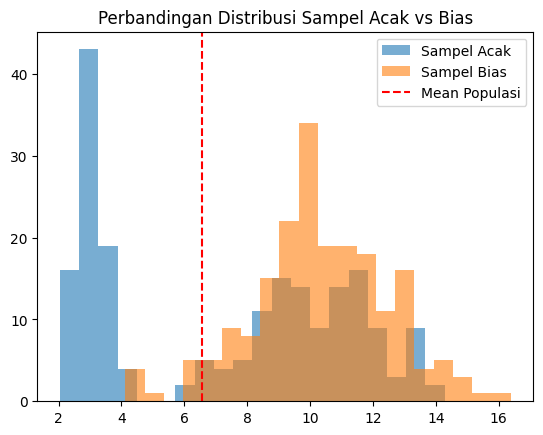

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Populasi: pendapatan (dalam juta rupiah)
np.random.seed(42)
populasi = np.concatenate([
    np.random.normal(3, 0.5, 1000),   # kelompok berpendapatan rendah
    np.random.normal(10, 2, 1000)     # kelompok berpendapatan tinggi
])

# Sampel acak (representatif)
sample_random = np.random.choice(populasi, 200)

# Sampel bias (hanya dari kelompok berpendapatan tinggi)
sample_bias = np.random.choice(populasi[1000:], 200)

print("Rata-rata populasi:", round(np.mean(populasi), 2))
print("Rata-rata sampel acak:", round(np.mean(sample_random), 2))
print("Rata-rata sampel bias:", round(np.mean(sample_bias), 2))

# Visualisasi
plt.hist(sample_random, bins=20, alpha=0.6, label='Sampel Acak')
plt.hist(sample_bias, bins=20, alpha=0.6, label='Sampel Bias')
plt.axvline(np.mean(populasi), color='red', linestyle='--', label='Mean Populasi')
plt.legend()
plt.title("Perbandingan Distribusi Sampel Acak vs Bias")
plt.show()

# **Sampling Distribution of the Sample Mean (SDSM)**

---


## **1. Pengantar Konsep**

Dalam statistik, ketika kita mengambil **satu sampel** dari populasi, kita bisa menghitung **rata-rata sampel (sample mean)**.
Namun, jika kita **mengambil banyak sampel acak** dari populasi yang sama dan menghitung **rata-rata setiap sampel**, kita akan mendapatkan **sekumpulan nilai rata-rata**.

Kumpulan nilai rata-rata tersebut membentuk suatu **distribusi baru**, yang disebut:

> 🎯 **Sampling Distribution of the Sample Mean**

---

## **2. Hubungan antara Populasi, Sampel, dan SDSM**

| Level                                  | Deskripsi                        | Contoh                                         |
| -------------------------------------- | -------------------------------- | ---------------------------------------------- |
| **Populasi**                           | Semua data yang mungkin diamati  | Semua pelanggan e-commerce                     |
| **Sampel**                             | Subset dari populasi             | 100 pelanggan acak                             |
| **Rata-rata Sampel (x̄)**              | Nilai rata-rata dari satu sampel | Rata-rata pengeluaran 100 pelanggan            |
| **Distribusi Rata-rata Sampel (SDSM)** | Distribusi dari banyak x̄        | Rata-rata pengeluaran dari 1000 sampel berbeda |

---

## **3. Central Limit Theorem (CLT)**

Teorema ini adalah dasar dari inferensi statistik.

> **Central Limit Theorem (CLT)** menyatakan:
> Jika kita mengambil banyak sampel acak dari populasi apa pun dengan ukuran sampel cukup besar (n ≥ 30), maka **distribusi rata-rata sampel akan mendekati distribusi normal**, meskipun populasi aslinya tidak normal.

### Rumus CLT

1. Mean dari distribusi rata-rata sampel:
   **μₓ̄ = μ**

   Artinya, rata-rata dari semua rata-rata sampel sama dengan rata-rata populasi.

2. Standard error (simpangan baku dari rata-rata sampel):
   **σₓ̄ = σ / √n**

   Artinya, semakin besar ukuran sampel (n), semakin kecil penyimpangan rata-rata sampel terhadap rata-rata populasi.

---

### Keterangan Simbol

* **μₓ̄** : Mean dari distribusi rata-rata sampel
* **σₓ̄** : Standard error (simpangan baku dari rata-rata sampel)
* **μ** : Mean populasi
* **σ** : Standar deviasi populasi
* **n** : Ukuran sampel

---

### Contoh CLT Data Science

Misalkan kamu seorang data scientist ingin memperkirakan **rata-rata pengeluaran pelanggan per bulan** di sebuah toko online.
Populasi pelanggan sangat besar (ratusan ribu orang), jadi kamu tidak mungkin mengukur semuanya.
Sebagai gantinya, kamu ambil **beberapa sampel acak** dari pelanggan dan menghitung rata-ratanya.

Menurut **CLT**, jika kamu terus mengambil sampel acak berukuran besar (misalnya n = 50, n = 100, dst.), maka distribusi rata-rata pengeluaran dari semua sampel tersebut akan berbentuk **normal**, meskipun pengeluaran tiap pelanggan tidak normal.

---

### Contoh Implementasi Python

```python
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Buat populasi pengeluaran pelanggan (tidak normal)
populasi = np.random.exponential(scale=100, size=100000)  # sebagian besar kecil, beberapa sangat besar

# Simulasi mengambil banyak sampel dan menghitung rata-ratanya
sample_means = []

for i in range(1000):
    sampel = np.random.choice(populasi, size=50)  # n = 50
    sample_means.append(np.mean(sampel))

# Plot hasil distribusi rata-rata sampel
plt.figure(figsize=(10,5))
plt.hist(sample_means, bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribusi Rata-rata Sampel (CLT)")
plt.xlabel("Rata-rata pengeluaran (Rp)")
plt.ylabel("Frekuensi")
plt.axvline(np.mean(populasi), color='red', linestyle='--', label='Mean Populasi')
plt.legend()
plt.show()
```

---

### Inti CLT dalam 3 Kalimat

1. Semakin besar ukuran sampel (n), distribusi rata-rata sampel semakin mendekati **normal**.
2. Mean dari rata-rata sampel sama dengan mean populasi (μₓ̄ = μ).
3. Standard error dari rata-rata sampel semakin kecil seiring dengan bertambahnya n (σₓ̄ = σ / √n).

---

## **4. Contoh Kasus di Data Science**

Katakan kamu bekerja di **divisi analitik e-commerce** dan ingin memperkirakan:

> “Berapa rata-rata pengeluaran pelanggan dalam satu bulan?”

Tapi kamu **tidak punya data semua pelanggan** (populasi terlalu besar).
Jadi kamu ambil **beberapa sampel acak pelanggan**, hitung rata-ratanya, lalu gunakan **distribusi rata-rata sampel (SDSM)** untuk memperkirakan mean populasi.

---

## **5. Simulasi Python – Membuktikan SDSM dan CLT**

Berikut simulasi menggunakan data sintetis yang menggambarkan pengeluaran pelanggan.

```python
import numpy as np
import matplotlib.pyplot as plt

# 1️ Membuat populasi data (tidak normal)
np.random.seed(42)
populasi = np.random.exponential(scale=100, size=100000)  # pengeluaran pelanggan (dalam ribu rupiah)

# 2️ Menentukan parameter sampling
sample_size = 50     # ukuran tiap sampel
n_samples = 1000     # jumlah sampel yang akan diambil

# 3️ Menghitung rata-rata dari setiap sampel
sample_means = []
for i in range(n_samples):
    sample = np.random.choice(populasi, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# 4️ Analisis hasil
print("Rata-rata populasi:", round(np.mean(populasi), 2))
print("Rata-rata distribusi sampel:", round(np.mean(sample_means), 2))
print("Standard Error (SD dari sample means):", round(np.std(sample_means), 2))

# 5️ Visualisasi hasil
plt.figure(figsize=(10,5))
plt.hist(sample_means, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(populasi), color='red', linestyle='--', label='Mean Populasi')
plt.title("Sampling Distribution of the Sample Mean (SDSM)")
plt.xlabel("Rata-rata Sampel")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()
```

---

## **6. Interpretasi Hasil**

Dari hasil simulasi di atas:

| Nilai                           | Arti                                                      |
| ------------------------------- | --------------------------------------------------------- |
| **Rata-rata populasi**          | Nilai rata-rata sesungguhnya dari seluruh data pelanggan. |
| **Rata-rata distribusi sampel** | Mendekati rata-rata populasi (validasi CLT).              |
| **Standard Error**              | Semakin kecil jika ukuran sampel (n) semakin besar.       |

🔹 **Visualisasi histogram** akan membentuk **kurva normal (bell curve)** meskipun populasi awal berdistribusi **exponential (miring)**.
🔹 Ini membuktikan **Central Limit Theorem bekerja** dalam praktek.

---

## **7. Eksperimen Lanjutan: Pengaruh Ukuran Sampel (n)**

Ubah `sample_size` pada kode di atas dan lihat perubahan distribusi:

| Ukuran Sampel (n) | Bentuk Distribusi             | Penyebaran (Standard Error) |
| ----------------- | ----------------------------- | --------------------------- |
| n = 5             | Sangat menyebar, belum normal | Besar                       |
| n = 30            | Mulai menyerupai normal       | Sedang                      |
| n = 100           | Hampir sempurna normal        | Kecil                       |

📈 Artinya, semakin besar ukuran sampel, **semakin stabil rata-rata sampel** dan semakin **dekat dengan mean populasi**.

---

## **8. Penerapan Nyata dalam Data Science**

| Bidang                 | Penerapan CLT dan SDSM                                                                        |
| ---------------------- | --------------------------------------------------------------------------------------------- |
| **A/B Testing**        | Menghitung distribusi rata-rata konversi pengguna pada versi A vs B.                          |
| **Customer Analytics** | Mengestimasi rata-rata pengeluaran pelanggan dari subset data.                                |
| **Model Evaluation**   | Menilai distribusi rata-rata error model (misal MAE atau RMSE) dari beberapa sampel validasi. |
| **Survey Analysis**    | Mengestimasi rata-rata opini masyarakat dari beberapa kelompok sampel.                        |

---

## **9. Ringkasan**

| Konsep                                       | Penjelasan Singkat                                                                |
| -------------------------------------------- | --------------------------------------------------------------------------------- |
| **Sampling Distribution of the Sample Mean** | Distribusi dari rata-rata-rerata sampel yang diambil dari populasi.               |
| **Central Limit Theorem (CLT)**              | Distribusi rata-rata sampel akan cenderung normal walaupun populasi tidak normal. |
| **Standard Error (SE)**                      | Mengukur variasi rata-rata sampel, dihitung dengan σ / √n.                        |
| **Ukuran Sampel (n)**                        | Semakin besar n → semakin kecil SE → hasil estimasi lebih akurat.                 |

---


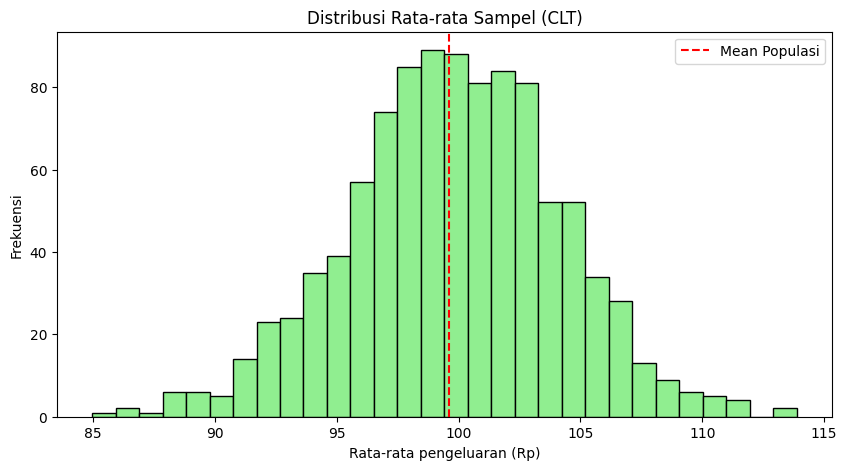

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Buat populasi pengeluaran pelanggan (tidak normal)
populasi = np.random.exponential(scale=100, size=100000)  # sebagian besar kecil, beberapa sangat besar

# Simulasi mengambil banyak sampel dan menghitung rata-ratanya
sample_means = []

for i in range(1000):
    sampel = np.random.choice(populasi, size=500)  # n = 5
    sample_means.append(np.mean(sampel))

# Plot hasil distribusi rata-rata sampel
plt.figure(figsize=(10,5))
plt.hist(sample_means, bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribusi Rata-rata Sampel (CLT)")
plt.xlabel("Rata-rata pengeluaran (Rp)")
plt.ylabel("Frekuensi")
plt.axvline(np.mean(populasi), color='red', linestyle='--', label='Mean Populasi')
plt.legend()
plt.show()


Rata-rata populasi: 99.6
Rata-rata distribusi sampel: 100.24
Standard Error (SD dari sample means): 43.16


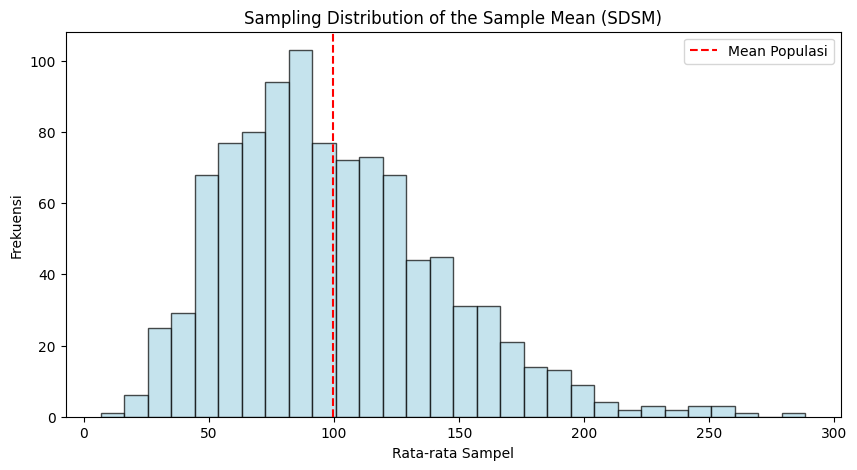

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1️ Membuat populasi data (tidak normal)
np.random.seed(42)
populasi = np.random.exponential(scale=100, size=100000)  # pengeluaran pelanggan (dalam ribu rupiah)

# 2️ Menentukan parameter sampling
sample_size = 5     # ukuran tiap sampel
n_samples = 1000     # jumlah sampel yang akan diambil

# 3️ Menghitung rata-rata dari setiap sampel
sample_means = []
for i in range(n_samples):
    sample = np.random.choice(populasi, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# 4️ Analisis hasil
print("Rata-rata populasi:", round(np.mean(populasi), 2))
print("Rata-rata distribusi sampel:", round(np.mean(sample_means), 2))
print("Standard Error (SD dari sample means):", round(np.std(sample_means), 2))

# 5️ Visualisasi hasil
plt.figure(figsize=(10,5))
plt.hist(sample_means, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(populasi), color='red', linestyle='--', label='Mean Populasi')
plt.title("Sampling Distribution of the Sample Mean (SDSM)")
plt.xlabel("Rata-rata Sampel")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

# Conditions for Inference with the Sampling Distribution of the Sample Mean (SDSM)

*(Syarat Inferensi Statistik pada Distribusi Rata-Rata Sampel)*

---

## 1. Mengapa Perlu Kondisi?

Sebelum kita menggunakan **SDSM (Sampling Distribution of the Sample Mean)** untuk menarik kesimpulan tentang populasi,
kita harus memastikan bahwa **data memenuhi kondisi tertentu**.

Jika kondisi ini tidak dipenuhi:

* Nilai rata-rata bisa bias,
* Confidence interval salah,
* Uji hipotesis tidak akurat.

---

## 2. Tiga Kondisi Utama Inferensi Statistik

| No  | Kondisi                            | Penjelasan                                                | Alasan Penting                                          |
| --- | ---------------------------------- | --------------------------------------------------------- | ------------------------------------------------------- |
| 1️ | **Random Sampling**                | Data harus diperoleh secara acak dari populasi.           | Menghindari bias dan memastikan data representatif.     |
| 2️ | **Independence (Kemandirian)**     | Setiap observasi tidak memengaruhi observasi lain.        | Menjamin perhitungan varians dan standard error akurat. |
| 3️ | **Normality / Large Sample (CLT)** | Jika populasi tidak normal, maka n ≥ 30 agar CLT berlaku. | Agar distribusi rata-rata sampel mendekati normal.      |

---

## 3. Penjelasan Tiap Kondisi

### a. Random Sampling

* Setiap anggota populasi punya **peluang yang sama** untuk dipilih.
* Contoh: Mengambil data pelanggan dari seluruh database secara acak, bukan hanya dari satu cabang.

**Kenapa penting:**
Kalau tidak acak, hasil sampel bisa bias dan tidak mewakili populasi sebenarnya.

---

### b. Independence

* Data tiap observasi **tidak saling bergantung**.
* Misal, satu pelanggan tidak memengaruhi perilaku pelanggan lain.

**Cara memeriksa:**

* Gunakan aturan **10% rule**:
  Jika ukuran sampel < 10% dari populasi, maka asumsi independensi masih aman.
  (n < 0.1 × N)

---

### c. Normality (atau Ukuran Sampel Besar)

* Jika populasi normal → distribusi rata-rata sampel juga normal.
* Jika populasi tidak normal → gunakan **Central Limit Theorem (CLT)**:
  Distribusi rata-rata sampel akan mendekati normal jika **n ≥ 30**.

---

## 4. Contoh Kasus Data Science

Misalnya kamu ingin memperkirakan **rata-rata waktu pengiriman barang** dari seluruh transaksi e-commerce.
Kamu hanya memiliki **data sampel 100 transaksi** dari total 100.000 pengiriman.

Agar bisa membuat inferensi (misalnya “estimasi rata-rata waktu pengiriman semua pelanggan”), kamu perlu memastikan:

1. Data transaksi dipilih secara **acak**.
2. Setiap pengiriman **independen** satu sama lain.
3. Ukuran sampel **cukup besar (≥30)** agar CLT berlaku.

Kalau ketiga hal ini terpenuhi, kamu bisa menggunakan distribusi normal (atau t-distribution) untuk inferensi.

---

## 5. Implementasi Python: Mengecek Kondisi Inferensi

Kita buat simulasi sederhana untuk memeriksa kondisi inferensi ini.

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

# 1️ Buat populasi waktu pengiriman (tidak normal)
populasi = np.random.exponential(scale=3.0, size=100000)  # waktu dalam hari

# 2️ Ambil sampel acak
n = 50
sampel = np.random.choice(populasi, size=n, replace=False)

# 3️ Cek kondisi 1: Random Sampling (sudah acak dengan np.random.choice)

# 4️ Cek kondisi 2: Independence
independen = (n / len(populasi)) < 0.1
print("Kondisi Independence terpenuhi:", independen)

# 5️ Cek kondisi 3: Normality
stat, p_value = stats.shapiro(sampel)
print("P-value Shapiro-Wilk:", round(p_value, 4))

if p_value > 0.05:
    print(" Sampel terdistribusi normal (inferensi valid).")
else:
    print(" Sampel tidak normal, tapi CLT berlaku jika n ≥ 30.")

# 6️ Visualisasi distribusi sampel
plt.hist(sampel, bins=15, color='lightblue', edgecolor='black')
plt.title("Distribusi Sampel Waktu Pengiriman")
plt.xlabel("Hari")
plt.ylabel("Frekuensi")
plt.show()
```

---

## 6. Interpretasi Hasil

* **Random Sampling:** Dipenuhi karena `np.random.choice()` acak.
* **Independence:** Dipenuhi karena n = 50 < 10% × 100000.
* **Normality:** Populasi tidak normal, tapi CLT berlaku (n = 50 ≥ 30).

Jadi, ketiga kondisi inferensi terpenuhi.
Artinya kita boleh menggunakan **distribusi t** atau **normal** untuk inferensi terhadap rata-rata populasi.

---

## 7. Visualisasi Distribusi Rata-Rata Sampel

Mari kita buktikan bahwa distribusi rata-rata sampel mendekati normal meskipun data populasi tidak normal.

```python
sample_means = []

for i in range(1000):
    s = np.random.choice(populasi, size=n, replace=False)
    sample_means.append(np.mean(s))

plt.figure(figsize=(10,5))
plt.hist(sample_means, bins=30, color='lightgreen', edgecolor='black')
plt.axvline(np.mean(populasi), color='red', linestyle='--', label='Mean Populasi')
plt.title("Distribusi Rata-rata Sampel (SDSM)")
plt.xlabel("Rata-rata Waktu Pengiriman")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()
```

✅ Hasilnya akan menunjukkan **kurva lonceng (normal)** — bukti bahwa CLT bekerja dan kondisi inferensi bisa diterapkan.

---

## 8. Rangkuman

| Kondisi         | Keterangan                                | Harus Dipenuhi |
| --------------- | ----------------------------------------- | -------------- |
| Random Sampling | Data diambil secara acak                  | ✅              |
| Independence    | Observasi tidak bergantung satu sama lain | ✅              |
| Normality / CLT | Data normal atau n ≥ 30                   | ✅              |

---

## 9. Penerapan di Dunia Nyata (Data Science)

| Bidang                      | Contoh Penggunaan Kondisi Inferensi                                                               |
| --------------------------- | ------------------------------------------------------------------------------------------------- |
| **A/B Testing**             | Pastikan pengguna acak dan independen sebelum membandingkan rata-rata performa dua versi website. |
| **Customer Analytics**      | Menarik inferensi tentang rata-rata rating pelanggan dari sampel.                                 |
| **Operational Performance** | Mengestimasi rata-rata waktu pelayanan dari sejumlah cabang.                                      |
| **Survey Analysis**         | Menentukan apakah data survei online memenuhi syarat inferensi.                                   |

---

Kondisi Independence terpenuhi: True
P-value Shapiro-Wilk: 0.0
 Sampel tidak normal, tapi CLT berlaku jika n ≥ 30.


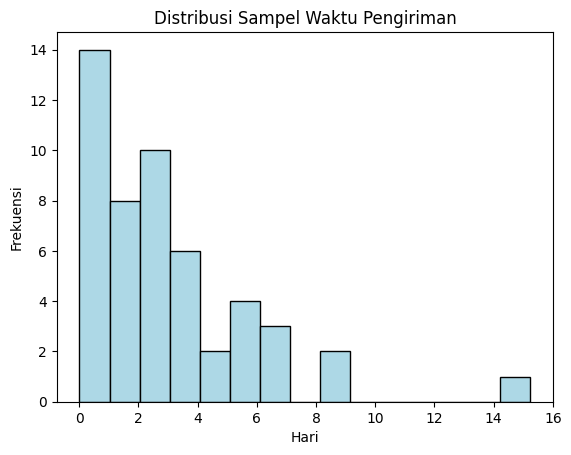

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

# 1️ Buat populasi waktu pengiriman (tidak normal)
populasi = np.random.exponential(scale=3.0, size=100000)  # waktu dalam hari

# 2️ Ambil sampel acak
n = 50
sampel = np.random.choice(populasi, size=n, replace=False)

# 3️ Cek kondisi 1: Random Sampling (sudah acak dengan np.random.choice)

# 4️ Cek kondisi 2: Independence
independen = (n / len(populasi)) < 0.1
print("Kondisi Independence terpenuhi:", independen)

# 5️ Cek kondisi 3: Normality
stat, p_value = stats.shapiro(sampel)
print("P-value Shapiro-Wilk:", round(p_value, 4))

if p_value > 0.05:
    print(" Sampel terdistribusi normal (inferensi valid).")
else:
    print(" Sampel tidak normal, tapi CLT berlaku jika n ≥ 30.")

# 6️ Visualisasi distribusi sampel
plt.hist(sampel, bins=15, color='lightblue', edgecolor='black')
plt.title("Distribusi Sampel Waktu Pengiriman")
plt.xlabel("Hari")
plt.ylabel("Frekuensi")
plt.show()

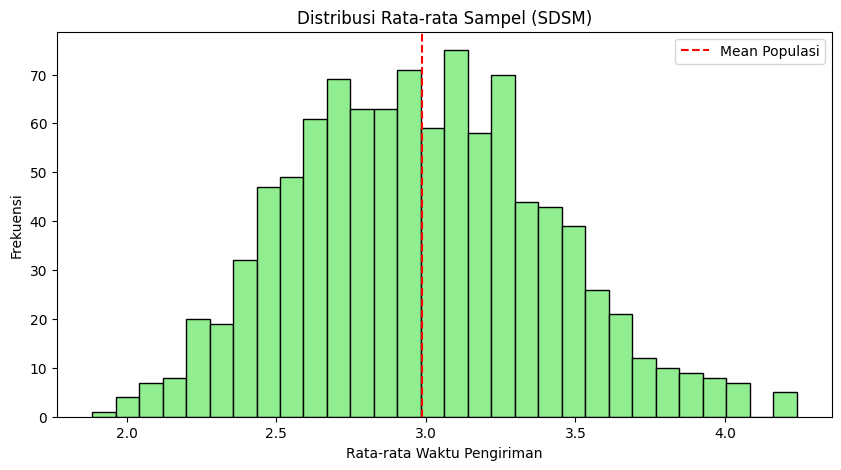

In [2]:
sample_means = []

for i in range(1000):
    s = np.random.choice(populasi, size=n, replace=False)
    sample_means.append(np.mean(s))

plt.figure(figsize=(10,5))
plt.hist(sample_means, bins=30, color='lightgreen', edgecolor='black')
plt.axvline(np.mean(populasi), color='red', linestyle='--', label='Mean Populasi')
plt.title("Distribusi Rata-rata Sampel (SDSM)")
plt.xlabel("Rata-rata Waktu Pengiriman")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

# Sampling Distribution of the Sample Proportion (SDSP)

*(Distribusi Sampling dari Proporsi Sampel)*



## 1. Apa Itu Sample Proportion?

Dalam statistik, **proporsi (p̂)** adalah **persentase** dari suatu kejadian dalam sampel.

Contoh:

* Dari 1.000 pelanggan, 270 melakukan pembelian.
  Maka proporsi pembelian dalam sampel adalah:

  **p̂ = 270 / 1000 = 0.27**

Kita ingin tahu: apakah proporsi pembeli di populasi (p) juga sekitar 27%?
Untuk itu, kita gunakan **sampling distribution of the sample proportion (SDSP)**.

---

## 2. Konsep Dasar SDSP

Jika kita mengambil banyak sampel acak dari populasi dan menghitung **proporsi keberhasilan (p̂)** pada tiap sampel,
maka nilai-nilai p̂ itu akan membentuk distribusi tersendiri.

Distribusi inilah yang disebut **sampling distribution of the sample proportion**.

---

## 3. Rumus-Rumus Penting

1. **Rata-rata distribusi proporsi sampel:**

   p̂_mean = p
   (rata-rata dari semua p̂ sama dengan proporsi populasi)

2. **Standard error dari p̂:**

   SE(p̂) = √(p × (1 - p) / n)

   di mana:

   * p = proporsi populasi
   * n = ukuran sampel

3. **Distribusi p̂** akan mendekati **distribusi normal** jika memenuhi syarat inferensi (lihat di bawah).

---

## 4. Kondisi untuk Inferensi (SDSP)

Agar inferensi terhadap proporsi valid, tiga kondisi utama harus dipenuhi:

| Kondisi                          | Keterangan                        |
| -------------------------------- | --------------------------------- |
| **1️ Random Sampling**          | Sampel diambil secara acak.       |
| **2️ Independence**             | n < 10% dari populasi (10% rule). |
| **3️ Normality (Large Sample)** | np ≥ 10 dan n(1 - p) ≥ 10         |

Kondisi ke-3 memastikan jumlah "sukses" dan "gagal" cukup besar agar distribusi p̂ mendekati normal.

---

## 5. Contoh Kasus Data Science

Seorang data scientist ingin memperkirakan **proporsi pengguna aplikasi yang masih aktif setelah 30 hari (retention rate)**.
Dari 5.000 pengguna yang baru mendaftar, diambil sampel acak 200 pengguna dan 60 di antaranya masih aktif.

Maka:

* p̂ = 60 / 200 = 0.30
* n = 200
* Kita ingin tahu bentuk distribusi p̂ jika eksperimen ini diulang berkali-kali.

---

## 6. Simulasi SDSP dengan Python

```python
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# 1️ Populasi pengguna (1 = aktif, 0 = tidak aktif)
N = 5000
p_true = 0.3  # proporsi sebenarnya di populasi
populasi = np.random.choice([1, 0], size=N, p=[p_true, 1-p_true])

# 2️ Sampling parameter
n = 200          # ukuran sampel
n_samples = 1000 # banyaknya sampel diambil

# 3️ Simulasi sampling dan hitung proporsi
sample_props = []
for i in range(n_samples):
    sample = np.random.choice(populasi, size=n, replace=False)
    p_hat = np.mean(sample)
    sample_props.append(p_hat)

# 4️ Analisis hasil
print("Proporsi populasi (p):", p_true)
print("Rata-rata proporsi sampel (p̂_mean):", round(np.mean(sample_props), 3))
print("Standard Error (SE):", round(np.std(sample_props), 3))

# 5️ Visualisasi hasil
plt.figure(figsize=(10,5))
plt.hist(sample_props, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(p_true, color='blue', linestyle='--', label='Proporsi Populasi (p)')
plt.title("Sampling Distribution of the Sample Proportion (SDSP)")
plt.xlabel("Proporsi Sampel (p̂)")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()
```

---

## 7. Interpretasi Hasil

* Rata-rata dari semua p̂ mendekati p = 0.3
* Distribusi proporsi sampel membentuk **kurva normal** (bell shape)
* Standard error menunjukkan seberapa besar variasi proporsi antar sampel.

Artinya, jika kamu ambil 1000 sampel acak berbeda dari populasi,
hasil proporsi aktif (p̂) akan berkisar di sekitar 0.3, dengan variasi kecil yang diprediksi oleh standard error.

---

## 8. Rumus Hubungan Utama

| Konsep              | Rumus                       | Keterangan                                              |
| ------------------- | --------------------------- | ------------------------------------------------------- |
| Mean dari p̂        | p̂_mean = p                 | Rata-rata proporsi sampel sama dengan proporsi populasi |
| Standard Error      | SE(p̂) = sqrt(p(1 - p) / n) | Ukuran variasi proporsi antar sampel                    |
| Normality Condition | np ≥ 10 dan n(1 - p) ≥ 10   | Menentukan apakah distribusi p̂ mendekati normal        |

---

## 9. Contoh Perhitungan Manual

Misal:

* p = 0.3
* n = 200

Maka:

* np = 200 × 0.3 = 60 ≥ 10 ✅
* n(1 - p) = 200 × 0.7 = 140 ≥ 10 ✅
* SE = √(0.3 × 0.7 / 200) = √(0.21 / 200) = √(0.00105) ≈ 0.0324

Artinya, **standard error = 0.0324**,
dan p̂ akan berfluktuasi sekitar 0.3 ± 0.0324.

---

## 10. Visualisasi Normal Approximation

Kita bisa memplot distribusi normal teoretis dari p̂ untuk dibandingkan dengan simulasi.

```python
import scipy.stats as stats

mean = p_true
se = np.sqrt(p_true * (1 - p_true) / n)
x = np.linspace(0.15, 0.45, 100)
y = stats.norm.pdf(x, mean, se)

plt.figure(figsize=(10,5))
plt.hist(sample_props, bins=30, density=True, color='lightcoral', alpha=0.6, label='Simulasi p̂')
plt.plot(x, y, color='blue', linewidth=2, label='Normal Approximation')
plt.axvline(mean, color='black', linestyle='--', label='p (0.3)')
plt.title("Distribusi Proporsi Sampel vs Normal Approximation")
plt.xlabel("Proporsi Sampel (p̂)")
plt.ylabel("Kepadatan")
plt.legend()
plt.show()
```

📊 Hasilnya: Kurva normal hampir menumpuk dengan histogram p̂ →
menunjukkan bahwa SDSP dapat didekati dengan distribusi normal jika syarat inferensi terpenuhi.

---

## 11. Aplikasi di Dunia Data Science

| Bidang                 | Contoh Penggunaan Proporsi                                     |
| ---------------------- | -------------------------------------------------------------- |
| **A/B Testing**        | Menghitung proporsi pengguna yang klik tombol di versi A vs B. |
| **Customer Retention** | Mengetahui persentase pengguna yang aktif setelah 30 hari.     |
| **Survey Analysis**    | Menentukan proporsi responden yang memilih opsi tertentu.      |
| **Email Marketing**    | Mengukur proporsi email yang dibuka dari total dikirim.        |


Proporsi populasi (p): 0.3
Rata-rata proporsi sampel (p̂_mean): 0.306
Standard Error (SE): 0.032


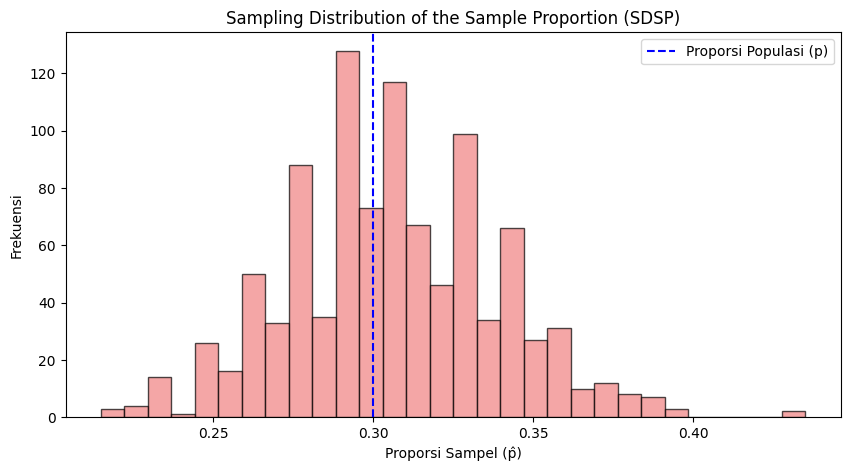

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

# 1️ Populasi pengguna (1 = aktif, 0 = tidak aktif)
N = 5000
p_true = 0.3  # proporsi sebenarnya di populasi
populasi = np.random.choice([1, 0], size=N, p=[p_true, 1-p_true])

# 2️ Sampling parameter
n = 200          # ukuran sampel
n_samples = 1000 # banyaknya sampel diambil

# 3️ Simulasi sampling dan hitung proporsi
sample_props = []
for i in range(n_samples):
    sample = np.random.choice(populasi, size=n, replace=False)
    p_hat = np.mean(sample)
    sample_props.append(p_hat)

# 4️ Analisis hasil
print("Proporsi populasi (p):", p_true)
print("Rata-rata proporsi sampel (p̂_mean):", round(np.mean(sample_props), 3))
print("Standard Error (SE):", round(np.std(sample_props), 3))

# 5️ Visualisasi hasil
plt.figure(figsize=(10,5))
plt.hist(sample_props, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(p_true, color='blue', linestyle='--', label='Proporsi Populasi (p)')
plt.title("Sampling Distribution of the Sample Proportion (SDSP)")
plt.xlabel("Proporsi Sampel (p̂)")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

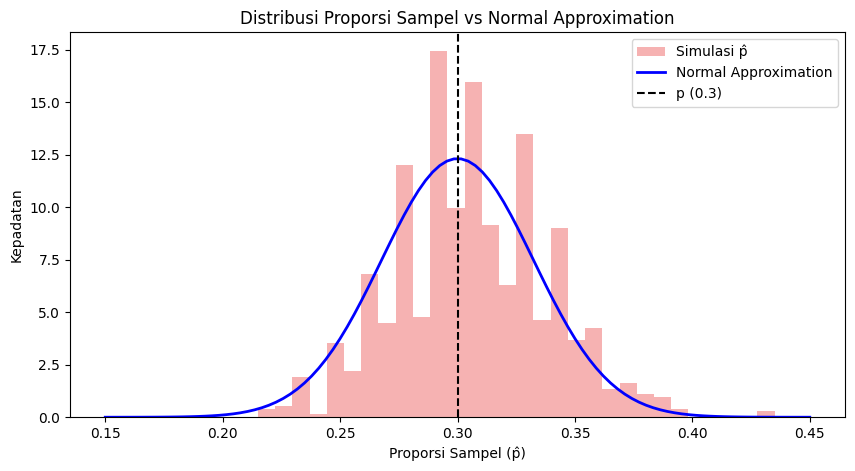

In [4]:
mean = p_true
se = np.sqrt(p_true * (1 - p_true) / n)
x = np.linspace(0.15, 0.45, 100)
y = stats.norm.pdf(x, mean, se)

plt.figure(figsize=(10,5))
plt.hist(sample_props, bins=30, density=True, color='lightcoral', alpha=0.6, label='Simulasi p̂')
plt.plot(x, y, color='blue', linewidth=2, label='Normal Approximation')
plt.axvline(mean, color='black', linestyle='--', label='p (0.3)')
plt.title("Distribusi Proporsi Sampel vs Normal Approximation")
plt.xlabel("Proporsi Sampel (p̂)")
plt.ylabel("Kepadatan")
plt.legend()
plt.show()

## **Conditions for the Sampling Distribution of the Sample Proportion (SDSP)**

---

### **1. Random Sampling (Sampel Acak)**

* Sampel harus diambil secara **acak** dari populasi.
* Tujuannya agar setiap individu punya peluang yang sama untuk terpilih.
* Ini memastikan hasilnya **tidak bias**.

**Contoh:**

> 200 pengguna dipilih secara acak dari 5.000 pengguna aplikasi,
> bukan hanya dari kelompok tertentu seperti pengguna aktif harian.

---

### **2. Independence (Kemandirian)**

* Setiap observasi (pengguna) harus **independen** satu sama lain.
* Umumnya terpenuhi jika **ukuran sampel kecil dibanding populasi**,
  yaitu jika **n ≤ 10% dari populasi (N)**.

**Contoh:**

> n = 200 dan N = 5000
> Karena 200 ≤ 10% × 5000 (yaitu 500), maka syarat ini **terpenuhi** ✅

---

### **3. Large Enough Sample Size (Ukuran Sampel Cukup Besar)**

Agar distribusi p̂ mendekati normal, nilai **np ≥ 10** dan **n(1 - p) ≥ 10** harus terpenuhi.

Artinya:

* np = jumlah sukses yang diharapkan
* n(1 - p) = jumlah gagal yang diharapkan

**Contoh:**

> n = 200, p = 0.3
> np = 200 × 0.3 = 60
> n(1 - p) = 200 × 0.7 = 140
> Keduanya lebih besar dari 10 ✅
> Maka distribusi p̂ dapat dianggap **mendekati normal**.

---

### Kesimpulan:

Jika ketiga syarat ini terpenuhi:

1. Sampel acak
2. Observasi independen (n ≤ 10% dari N)
3. Ukuran sampel besar (np ≥ 10 dan n(1 - p) ≥ 10)

➡ Maka distribusi p̂ dapat didekati oleh **distribusi normal** dengan:

> mean = p
> standard deviation = sqrt(p × (1 - p) / n)

---


# **The student's t-distribution**

## 1. Apa itu t-distribution?

**t-distribution (distribusi t)** adalah **bentuk kurva probabilitas**
yang digunakan untuk menggambarkan bagaimana **nilai rata-rata sampel** bisa bervariasi
saat kita **tidak tahu standar deviasi populasi (σ)** dan ukuran sampel **kecil (n < 30)**.

➡️ Jadi: **t-distribution adalah model teoretisnya**,
yang menjelaskan bagaimana *t-value* akan tersebar jika kamu mengulang eksperimen berkali-kali.

---

## 2. Kenapa Ada t-distribution (dan bukan normal biasa)?

Kita mulai dari yang dasar.

Kalau kamu tahu σ (standar deviasi populasi),
rata-rata sampel (x̄) akan mengikuti **distribusi normal**:

z = (x̄ - μ) / (σ / √n)

Tapi dalam dunia nyata (terutama di data science),
σ hampir **selalu tidak diketahui**.
Kita cuma punya **standar deviasi sampel (s)**.

Jadi rumusnya berubah jadi:

t = (x̄ - μ) / (s / √n)

Nah, karena kita pakai **s (yang diestimasi dari data)**,
hasilnya jadi **lebih tidak pasti** → distribusinya punya **ekor lebih tebal** dari normal.

Distribusi baru inilah yang disebut **t-distribution**.

---

## 3. Apa yang Berubah dari Normal ke t?

| Aspek              | Normal Distribution (Z) | t-Distribution                              |
| :----------------- | :---------------------- | :------------------------------------------ |
| Standar deviasi    | Diketahui (σ)           | Tidak diketahui (pakai s)                   |
| Ukuran sampel      | Besar (≥ 30)            | Kecil (< 30)                                |
| Bentuk kurva       | Sempit, simetris        | Sama-sama simetris tapi ekornya lebih lebar |
| Parameter tambahan | Tidak ada               | Ada “derajat kebebasan” (df = n - 1)        |

➡️ “Ekor lebar” artinya nilai ekstrem (t besar) **lebih mungkin terjadi**.
Ini wajar, karena kita memperhitungkan **ketidakpastian lebih besar**.

---

## 4. Derajat Kebebasan (Degrees of Freedom)

t-distribution punya parameter **df = n - 1**.
Semakin besar df, semakin “mirip” t dengan distribusi normal.

Contoh:

* n = 5 → df = 4 → kurva sangat lebar
* n = 30 → df = 29 → kurva sudah hampir sama dengan normal
* n = 100 → df = 99 → hampir identik dengan normal

---

## 5. Visualisasi: Perbandingan Normal vs t-distribution

```python
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-4, 4, 500)
normal = stats.norm.pdf(x, 0, 1)
t5 = stats.t.pdf(x, df=5)
t30 = stats.t.pdf(x, df=30)

plt.figure(figsize=(10,5))
plt.plot(x, normal, 'k-', label='Normal Distribution')
plt.plot(x, t5, 'r--', label='t-distribution (df=5)')
plt.plot(x, t30, 'b-.', label='t-distribution (df=30)')
plt.title("Perbandingan Normal vs t-Distribution")
plt.xlabel("Nilai")
plt.ylabel("Kepadatan")
plt.legend()
plt.show()
```

📊 **Interpretasi:**

* Garis **hitam (normal)** → kurva standar.
* Garis **merah (t, df=5)** → ekor lebih lebar → lebih “hati-hati”.
* Garis **biru (t, df=30)** → hampir sama dengan normal.

---


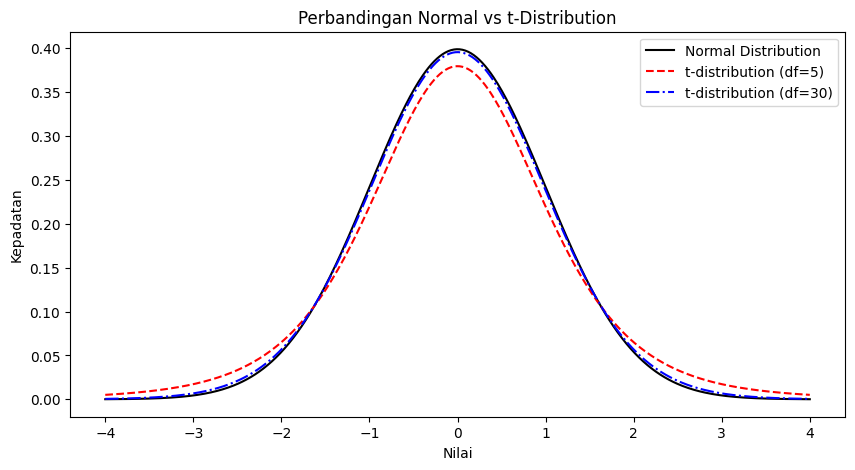

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-4, 4, 500)
normal = stats.norm.pdf(x, 0, 1)
t5 = stats.t.pdf(x, df=5)
t30 = stats.t.pdf(x, df=30)

plt.figure(figsize=(10,5))
plt.plot(x, normal, 'k-', label='Normal Distribution')
plt.plot(x, t5, 'r--', label='t-distribution (df=5)')
plt.plot(x, t30, 'b-.', label='t-distribution (df=30)')
plt.title("Perbandingan Normal vs t-Distribution")
plt.xlabel("Nilai")
plt.ylabel("Kepadatan")
plt.legend()
plt.show()

## **Kapan t-distribution digunakan dalam data science**

Distribusi t dipakai **setiap kali kamu ingin membuat inferensi tentang rata-rata (mean)** dari suatu data, **tetapi standar deviasi populasi tidak diketahui** dan **jumlah sampelnya terbatas**.

Dengan kata lain:

> **Gunakan t-distribution saat kamu ingin mengestimasi atau menguji rata-rata dari data kecil dan tidak tahu σ populasi.**

---

## 1. Estimasi Mean dari Sampel Kecil

### Kasus nyata:

Seorang **data scientist** sedang menganalisis waktu loading rata-rata aplikasi.
Karena datanya besar banget (jutaan pengguna), dia hanya ambil **sampel acak 20 pengguna**.

Dia mau tahu:

> Apakah waktu rata-rata loading aplikasi kurang dari 2 detik?

* Populasi tidak diketahui → σ tidak ada
* Ukuran sampel kecil (n = 20)
  ➡️ **Gunakan t-distribution**

---

## 2. Confidence Interval untuk Mean

Kalau kamu ingin membuat **interval estimasi** untuk rata-rata (misalnya 95% confidence interval),
dan kamu cuma punya data sampel (tanpa σ populasi), maka:

> Kamu pakai **t-distribution** untuk menentukan margin of error.

Contoh:

```python
# hitung confidence interval dengan t-distribution
import numpy as np
from scipy.stats import t

data = [78, 82, 85, 80, 90, 88, 84, 83, 81, 79]
n = len(data)
mean = np.mean(data)
s = np.std(data, ddof=1)
df = n - 1
alpha = 0.05

# nilai t kritis (dua sisi, 95% confidence)
t_critical = t.ppf(1 - alpha/2, df)

margin_error = t_critical * (s / np.sqrt(n))
ci_lower = mean - margin_error
ci_upper = mean + margin_error

print(f"95% CI: ({ci_lower:.2f}, {ci_upper:.2f})")
```

---

## 3. Model Validasi atau A/B Testing Skala Kecil

Saat melakukan **eksperimen kecil (misalnya uji coba fitur baru)** dan kamu ingin tahu apakah rata-rata metrik berbeda (misalnya rata-rata waktu aktif, rata-rata klik, dll),
kalau datanya masih sedikit → gunakan t-distribution untuk menghitung ketidakpastian mean.

> Di sini belum masuk ke *t-test* ya — tapi t-distribution-nya tetap dipakai sebagai dasar perhitungan.

---

## 4. Machine Learning – Model Evaluation (konteks inferensi)

Ketika kamu ingin mengetahui **rata-rata akurasi model dari beberapa percobaan** (misalnya hasil cross-validation kecil),
tapi kamu cuma punya sedikit percobaan (misalnya 5 atau 10 fold),
maka kamu bisa gunakan **t-distribution** untuk membuat interval kepercayaan atas nilai mean akurasi.

---

## Kesimpulan

| Situasi                                    | Gunakan Distribusi | Alasannya                   |
| ------------------------------------------ | ------------------ | --------------------------- |
| σ populasi diketahui                       | Normal (Z)         | Data cukup pasti            |
| σ populasi tidak diketahui, n kecil (< 30) | **t-distribution** | Ada ketidakpastian tambahan |
| σ populasi tidak diketahui, n besar        | t ≈ normal         | Ekor t makin tipis          |

---

Jadi dalam konteks **data science**,
distribusi t muncul saat kamu ingin:

* Membuat **estimasi mean dengan data terbatas**,
* Membuat **confidence interval mean**,
* Mengukur **ketidakpastian rata-rata metrik kecil**,
* Atau melakukan **eksperimen kecil sebelum A/B test besar**.

---

# **Confidence Interval for the Mean (Interval Kepercayaan untuk Rata-rata)**

## 1. Apa itu Confidence Interval (CI)?

Confidence Interval adalah **rentang nilai** yang kemungkinan besar berisi **rata-rata sebenarnya dari populasi** (μ).
CI tidak memberi satu nilai pasti, tetapi memberikan **perkiraan dengan tingkat keyakinan tertentu** (misalnya 95%).

> Contoh: “Kita 95% yakin bahwa rata-rata waktu pengguna di aplikasi berada antara 78 dan 85 menit.”

Artinya, jika kita mengambil banyak sampel dan menghitung CI untuk masing-masing, sekitar **95% dari interval itu akan mencakup nilai rata-rata populasi yang sebenarnya.**

---

## 2. Rumus Confidence Interval untuk Mean

Ada dua kasus tergantung informasi yang kita punya:

### **a. Jika standar deviasi populasi (σ) diketahui**

Gunakan distribusi **Z (normal)**:

```
CI = x̄ ± Z * (σ / √n)
```

### **b. Jika σ tidak diketahui** (biasanya di dunia nyata)

Gunakan **t-distribution**:

```
CI = x̄ ± t * (s / √n)
```

Keterangan:

* x̄ = rata-rata sampel
* s = standar deviasi sampel
* n = ukuran sampel
* t = nilai kritis dari distribusi t berdasarkan tingkat kepercayaan dan derajat kebebasan (df = n - 1)

---

## 3. Contoh Kasus (Data Science)

Seorang **data analyst** ingin memperkirakan rata-rata waktu pengguna menggunakan fitur baru aplikasi per hari.
Dari **20 pengguna acak**, ia mencatat waktu penggunaan (dalam menit):

```
[78, 82, 85, 80, 90, 88, 84, 83, 81, 79, 77, 85, 86, 84, 83, 80, 82, 88, 87, 81]
```

Dia ingin menghitung **interval kepercayaan 95%** untuk rata-rata waktu penggunaan.

---

## 4. Penyelesaian dengan Python

```python
import numpy as np
from scipy.stats import t

# Data waktu penggunaan (menit)
data = [78, 82, 85, 80, 90, 88, 84, 83, 81, 79, 77, 85, 86, 84, 83, 80, 82, 88, 87, 81]

# Hitung parameter dasar
n = len(data)
x_bar = np.mean(data)
s = np.std(data, ddof=1)
df = n - 1

# Tentukan tingkat kepercayaan
confidence = 0.95
alpha = 1 - confidence

# Nilai t kritis (dua sisi)
t_critical = t.ppf(1 - alpha/2, df)

# Hitung margin of error
SE = s / np.sqrt(n)
margin_error = t_critical * SE

# Hitung batas bawah dan atas CI
lower = x_bar - margin_error
upper = x_bar + margin_error

print(f"Mean sampel: {x_bar:.2f}")
print(f"Standard Error: {SE:.2f}")
print(f"Nilai t kritis: {t_critical:.3f}")
print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")
```

---

## 5. Interpretasi

Misalkan hasil perhitungan:

```
Mean sampel: 83.25
95% Confidence Interval: (81.40, 85.10)
```

Artinya:

> Kita **95% yakin** bahwa rata-rata waktu penggunaan fitur baru di seluruh populasi pengguna berada antara **81,4 dan 85,1 menit**.

---

## 6. Kapan Confidence Interval Ini Digunakan di Data Science

* Mengestimasi **rata-rata waktu loading aplikasi**
* Mengukur **rata-rata performa model ML** (misalnya akurasi rata-rata dari cross-validation kecil)
* Melaporkan hasil eksperimen kecil:
  “Dengan 95% keyakinan, rata-rata waktu respons API adalah antara 420–460 ms.”

---

## 7. Ringkasan Penting

| Kondisi           | Distribusi      | Rumus CI          |
| ----------------- | --------------- | ----------------- |
| σ diketahui       | Z (Normal)      | x̄ ± Z * (σ / √n) |
| σ tidak diketahui | t (Student’s t) | x̄ ± t * (s / √n) |

Semakin besar ukuran sampel (n), semakin kecil **margin of error**, dan semakin sempit intervalnya.

---

## Insight

Confidence interval membantu kita **memahami ketidakpastian** dalam estimasi.
Alih-alih hanya menyebut “rata-rata = 83 menit”, kita bisa melaporkan **rentang kepercayaan** yang jauh lebih informatif secara statistik.

---

# Lalu kalau kita sudah tahu **SDSM** kenapa harus pakai **Confidence Interval**

---

## 1. Kenyataannya di dunia nyata

Dalam praktik **data science**, kita **jarang sekali** tahu seluruh populasi.
Contohnya:

* Semua pelanggan Tokopedia, semua pengguna Instagram, atau seluruh pasien di Indonesia.
  Mustahil kita tahu **rata-rata pengeluaran seluruh populasi (μ)**.
* Yang bisa kita lakukan hanyalah mengambil **1 sampel acak** (misalnya 500 orang).

Nah, **SDSM (Sampling Distribution of the Sample Mean)** itu adalah *konsep teoretis* —
kita tidak benar-benar menghitungnya dari data nyata.
Kita hanya tahu bahwa **jika kita mengambil banyak sampel**, rata-rata dari sampel-sampel itu akan mengikuti distribusi normal (berdasarkan CLT).

---

## 2. Tapi kita hanya punya 1 sampel nyata

Karena itu, kita tidak bisa melihat seluruh **SDSM** langsung, tapi kita **menggunakannya secara teoretis** untuk memperkirakan:

> “Seandainya saya ambil banyak sampel, kira-kira seberapa bervariasi nilai rata-ratanya?”

Itu sebabnya kita menghitung **standard error (SE)**:

```
SE = s / √n
```

dan kemudian membentuk **Confidence Interval (CI)**:

```
CI = x̄ ± t * SE
```

---

## 3. Jadi fungsi CI adalah: "meniru" SDSM dari satu sampel

Kamu bisa anggap begini:

| Konsep                                | Bisa dihitung langsung? | Tujuan                                                               |
| ------------------------------------- | ----------------------- | -------------------------------------------------------------------- |
| **SDSM**                              | Tidak (konsep teoretis) | Menunjukkan variasi rata-rata sampel dari banyak percobaan           |
| **x̄ ± t * SE (Confidence Interval)** | Ya (dari 1 sampel)      | Mendekati rentang nilai di mana μ (mean populasi) kemungkinan berada |

---

## 4. Analogi sederhana

Bayangkan kamu ingin tahu **rata-rata tinggi semua mahasiswa di Indonesia**.
Kamu tidak bisa ukur semuanya (populasi), jadi kamu ambil **1 sampel 100 mahasiswa**.

Dari sini:

* Kamu dapat **x̄ (rata-rata sampel)** = 168 cm.
* Berdasarkan teori **SDSM**, kamu tahu kalau rata-rata sampel lain bisa naik-turun sedikit (karena variasi acak).
* Kamu hitung **CI 95% = 168 ± 2 cm**, lalu simpulkan:

  > “Saya 95% yakin bahwa rata-rata tinggi mahasiswa Indonesia berada antara 166–170 cm.”

Kita tidak butuh semua sampel untuk membuat distribusi SDSM nyata,
cukup **1 sampel** dan **rumus SDSM secara teoretis** untuk membuat estimasi.

---

## 5. Ringkasan perbandingan

| Konsep                              | Tujuan                                                          | Data yang dibutuhkan           |
| ----------------------------------- | --------------------------------------------------------------- | ------------------------------ |
| **SDSM**                            | Menjelaskan distribusi teoritis dari banyak rata-rata sampel    | Banyak sampel (teori/simulasi) |
| **x̄ ± t*SE (Confidence Interval)** | Memperkirakan posisi rata-rata populasi berdasarkan satu sampel | 1 sampel nyata                 |

---


In [1]:
import numpy as np
from scipy.stats import t

# Data waktu penggunaan (menit)
data = [78, 82, 85, 80, 90, 88, 84, 83, 81, 79, 77, 85, 86, 84, 83, 80, 82, 88, 87, 81]

# Hitung parameter dasar
n = len(data)
x_bar = np.mean(data)
s = np.std(data, ddof=1)
df = n - 1

# Tentukan tingkat kepercayaan
confidence = 0.95
alpha = 1 - confidence

# Nilai t kritis (dua sisi)
t_critical = t.ppf(1 - alpha/2, df)

# Hitung margin of error
SE = s / np.sqrt(n)
margin_error = t_critical * SE

# Hitung batas bawah dan atas CI
lower = x_bar - margin_error
upper = x_bar + margin_error

print(f"Mean sampel: {x_bar:.2f}")
print(f"Standard Error: {SE:.2f}")
print(f"Nilai t kritis: {t_critical:.3f}")
print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")

Mean sampel: 83.15
Standard Error: 0.79
Nilai t kritis: 2.093
95% Confidence Interval: (81.49, 84.81)


# **Confidence Interval for the Proportion (CI untuk Proporsi)**

---

## 🔹 1. Apa itu Confidence Interval untuk Proporsi?

CI untuk proporsi digunakan untuk memperkirakan **persentase atau peluang** suatu kejadian dalam populasi,
berdasarkan proporsi hasil dari **sampel acak**.

Contoh:

> Dari 200 pengguna yang disurvei, 60 masih aktif menggunakan aplikasi.
> Maka proporsi sampel (p̂) = 60/200 = 0.30.
>
> Kita ingin memperkirakan **proporsi sebenarnya (p)** dari seluruh populasi pengguna.

---

## 🔹 2. Rumus Confidence Interval untuk Proporsi

Rumus dasarnya:

```
CI = p̂ ± z * SE
```

dengan

```
SE = √(p̂ * (1 - p̂) / n)
```

Keterangan:

* p̂ = proporsi sampel
* n = ukuran sampel
* z = nilai kritis Z (misalnya 1.96 untuk 95% confidence level)
* SE = standard error (menunjukkan seberapa besar variasi proporsi antar-sampel)

---

## 🔹 3. Contoh Kasus Data Science

Seorang data scientist ingin memperkirakan **retention rate** (persentase pengguna yang tetap aktif setelah 30 hari).

Dari 200 pengguna baru yang disurvei:

* 60 pengguna masih aktif
* p̂ = 60/200 = 0.30
* n = 200
* Confidence level = 95% → z = 1.96

### Langkah perhitungan:

1. Hitung Standard Error:

   ```
   SE = √(0.30 * (1 - 0.30) / 200)
      = √(0.21 / 200)
      = √(0.00105)
      = 0.0324
   ```

2. Hitung Margin of Error (ME):

   ```
   ME = 1.96 * 0.0324 = 0.0635
   ```

3. Hitung Confidence Interval:

   ```
   CI = 0.30 ± 0.0635
      = (0.2365, 0.3635)
   ```

Artinya:

> Dengan tingkat keyakinan 95%, proporsi pengguna aktif di populasi diperkirakan antara **23.7% sampai 36.4%**.

---

## 🔹 4. Simulasi Python

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data
p_hat = 60 / 200
n = 200
z = norm.ppf(0.975)  # z-critical untuk 95%

# Hitung SE dan CI
SE = np.sqrt(p_hat * (1 - p_hat) / n)
ME = z * SE
CI_lower, CI_upper = p_hat - ME, p_hat + ME

print("Proporsi sampel (p̂):", round(p_hat, 3))
print("Standard Error:", round(SE, 4))
print("Margin of Error:", round(ME, 4))
print("Confidence Interval 95%: (", round(CI_lower, 3), ",", round(CI_upper, 3), ")")

# Visualisasi distribusi proporsi
x = np.linspace(0, 0.6, 200)
y = norm.pdf(x, p_hat, SE)

plt.figure(figsize=(9,5))
plt.plot(x, y, color='steelblue')
plt.axvline(p_hat, color='red', linestyle='--', label='p̂ (Sample Proportion)')
plt.axvline(CI_lower, color='black', linestyle=':', label='CI Lower')
plt.axvline(CI_upper, color='black', linestyle=':', label='CI Upper')
plt.fill_between(x, y, 0, where=(x>=CI_lower) & (x<=CI_upper), color='lightblue', alpha=0.5)
plt.title("Confidence Interval for the Proportion (95%)")
plt.xlabel("Proporsi (p)")
plt.ylabel("Kepadatan")
plt.legend()
plt.show()
```

---

## 🔹 5. Syarat Penggunaan Rumus CI untuk Proporsi

Agar pendekatan normal ini valid (bisa pakai z-critical), syaratnya:

```
n * p̂ ≥ 10  dan  n * (1 - p̂) ≥ 10
```

Artinya:

* Jumlah kasus sukses dan gagal dalam sampel harus cukup banyak agar distribusi proporsi mendekati normal.

Pada contoh:

```
n * p̂ = 200 * 0.30 = 60  (OK)
n * (1 - p̂) = 200 * 0.70 = 140  (OK)
```

Jadi, boleh pakai distribusi normal (z).

---

## 🔹 6. Interpretasi dalam konteks Data Science

CI ini sangat berguna untuk:

* Estimasi **retention rate**, **conversion rate**, atau **click-through rate (CTR)** dengan batas keyakinan.
* Membuat laporan bisnis berbasis statistik (misalnya: “kita 95% yakin CTR iklan kita antara 3%–5%”).
* Menentukan apakah perubahan versi A/B testing cukup signifikan untuk diuji lebih lanjut.



# Pertanyaan : itu kan kalau z dist, bagaimana kalau t dist apakah bisa menggunakan confidence interval untuk proportion ini

Jawaban singkatnya:

> 🔹 **Tidak — biasanya kita tidak pakai t-distribution untuk proporsi.**
> 🔹 Untuk **proporsi**, kita **hampir selalu pakai z-distribution** (distribusi normal standar).

Sekarang kita bahas **kenapa**

---

## 1. Perbedaan mendasar

Ingat bahwa **t-distribution** muncul karena:

* Kita **tidak tahu standar deviasi populasi (σ)**,
* dan kita **mengestimasikannya dari sampel (s)**.

Sedangkan **proporsi (p̂)** berbeda:

* Proporsi **selalu punya bentuk standar error yang sudah diketahui secara teoretis** dari distribusi binomial.

```
SE(p̂) = √(p̂ * (1 - p̂) / n)
```

Jadi, kita **tidak perlu mengestimasi σ dari sampel**, karena SE bisa dihitung langsung dari p̂.

---

## 2. Distribusi Proporsi = Pendekatan Normal (Z)

Distribusi p̂ berasal dari **distribusi binomial**, tapi untuk n besar:

> Distribusi binomial ≈ distribusi normal
> dengan mean = p dan SD = √(p(1−p)/n)

Itulah kenapa kita gunakan **Z-critical**, bukan T:

```
CI = p̂ ± z * √(p̂ * (1 - p̂) / n)
```

---

## 3. Syarat agar pendekatan Z valid

Agar distribusi proporsi mendekati normal, kita harus pastikan:

```
n * p̂ ≥ 10
n * (1 - p̂) ≥ 10
```

Kalau syarat ini tidak terpenuhi (misalnya p̂ terlalu kecil dan n kecil),
maka pendekatan normal tidak valid, dan **kita tidak pakai T**,
melainkan **distribusi binomial** secara eksak (bukan T).

---

## 4. Analogi Data Science

Bayangkan kamu mau memperkirakan:

* **Retention rate**, **click-through rate**, atau **conversion rate**.

Itu semua bentuknya **proporsi (antara 0–1)**,
jadi rumus yang dipakai selalu berbasis **Z-distribution**.

Contohnya:

```
CI_retention = p̂ ± z * √(p̂(1−p̂)/n)
```

Kamu tidak akan pakai **t-critical**, karena kamu tidak pernah memperkirakan σ dari data proporsi — SE-nya sudah ada secara matematis dari p̂ dan n.

---

## 5. Kesimpulan singkat

| Jenis estimasi                     | Rumus SE      | Distribusi yang dipakai         | Keterangan                              |
| ---------------------------------- | ------------- | ------------------------------- | --------------------------------------- |
| **Rata-rata (mean)**               | s / √n        | **T** (kalau σ tidak diketahui) | Ada ketidakpastian tambahan dari s      |
| **Proporsi (p̂)**                  | √(p̂(1−p̂)/n) | **Z**                           | SE langsung bisa dihitung dari p̂ dan n |
| **Sampel besar (mean & proporsi)** | —             | **Z**                           | Karena CLT berlaku                      |

---

Kalimat gampangnya:

> Kalau datanya **kuantitatif (mean)** → bisa T atau Z.
> Kalau datanya **kategorikal (proporsi)** → selalu Z.



Proporsi sampel (p̂): 0.3
Standard Error: 0.0324
Margin of Error: 0.0635
Confidence Interval 95%: ( 0.236 , 0.364 )


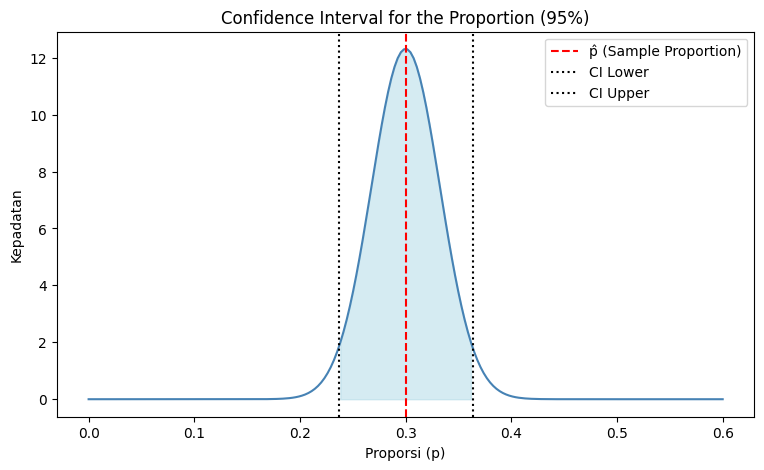

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data
p_hat = 60 / 200
n = 200
z = norm.ppf(0.975)  # z-critical untuk 95%

# Hitung SE dan CI
SE = np.sqrt(p_hat * (1 - p_hat) / n)
ME = z * SE
CI_lower, CI_upper = p_hat - ME, p_hat + ME

print("Proporsi sampel (p̂):", round(p_hat, 3))
print("Standard Error:", round(SE, 4))
print("Margin of Error:", round(ME, 4))
print("Confidence Interval 95%: (", round(CI_lower, 3), ",", round(CI_upper, 3), ")")

# Visualisasi distribusi proporsi
x = np.linspace(0, 0.6, 200)
y = norm.pdf(x, p_hat, SE)

plt.figure(figsize=(9,5))
plt.plot(x, y, color='steelblue')
plt.axvline(p_hat, color='red', linestyle='--', label='p̂ (Sample Proportion)')
plt.axvline(CI_lower, color='black', linestyle=':', label='CI Lower')
plt.axvline(CI_upper, color='black', linestyle=':', label='CI Upper')
plt.fill_between(x, y, 0, where=(x>=CI_lower) & (x<=CI_upper), color='lightblue', alpha=0.5)
plt.title("Confidence Interval for the Proportion (95%)")
plt.xlabel("Proporsi (p)")
plt.ylabel("Kepadatan")
plt.legend()
plt.show()